##  Bank Marketing

**Abstract:**
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

- Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

###  Attribute Information:   
####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')



### Import the necessary libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score

#to ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

### Read in the data set using the code:

In [28]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1IZQz-1sZtD7R2VVe_JuhWRf5vAMa-B2E/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
bank = pd.read_csv(csv_raw, sep=';') # the sep argument indicates how the data values are separated

### Examine the first few lines of the data set using the method

```data_frame.head()```

In [29]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Examine the data information using the method
```data_frame.info()```

In [30]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Check for missing values using the method
```data_frame.isnull().any()```

In [31]:
bank.isnull().any() # one way to search for null values

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

### Separate the numerical and categorical variables
They will be treated differently in preprocessing and in visualization

In [32]:
# separate the numerical columns
# 'age', 'duration','campaign','pdays', 'previous'

num_cols=['age', 'duration','campaign','pdays', 'previous']

In [33]:
# separate the categorical columns
# 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'

cat_cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

### Examine the first few rows of the numerical data

In [34]:
bank[num_cols]

,age,duration,campaign,pdays,previous
0,58,261,1,-1,0
1,44,151,1,-1,0
2,33,76,1,-1,0
3,47,92,1,-1,0
4,33,198,1,-1,0
...,...,...,...,...,...
45206,51,977,3,-1,0
45207,71,456,2,-1,0
45208,72,1127,5,184,3
45209,57,508,4,-1,0


### Run a statistical summary of the numerical data

In [35]:
bank[num_cols].describe()

,age,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,258.163080,2.763841,40.197828,0.580323
std,10.618762,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,4918.000000,63.000000,871.000000,275.000000


### Examine the first few rows of the categorical data


In [36]:
bank[cat_cols].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


### Creating dummy variables for the categorical variables.

Before doing so, check for the unique values in the column using the ```unique()``` method. The variables with only two values will be handled differently (note that this separation is not a requirement, merely conventional).

```data_frame['column'].unique()```

In [37]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [38]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [39]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [40]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [41]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [42]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

### Get dummies for ```'job', 'marital', 'education', 'contact', 'month', 'poutcome'```
Use the ```get_dummies()``` method for the variables with more than two categories. Reassign the bank data frame so that it has the newly transformed variables.
```
data_frame=pd.get_dummies(data=data_frame, columns=categorical_columns, drop_first=True)
```

In [43]:
#creating list of dummy columns
cat_cols_dummies=['job', 'marital', 'education', 'contact', 'month', 'poutcome']

#creating dummy variables and reassigning the data frame
bank = pd.get_dummies(data = bank, columns= cat_cols_dummies, drop_first= True)


### Convert ```yes', 'no'``` to ```0, 1```
For categorical variables with 'yes' or 'no' values, convert the 'yes' to 1 and the 'no' values to 0.

In [44]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [45]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [46]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [47]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [48]:
dict_default={'yes': 1, 'no':0}
dict_housing={'yes': 1, 'no':0}
dict_loan={'yes': 1, 'no':0}
dict_y={'yes': 1, 'no':0}

bank['default']=bank.default.map(dict_default)
bank['housing']=bank.housing.map(dict_housing)
bank['loan']=bank.loan.map(dict_loan)
bank['y']=bank.y.map(dict_y)


### Examine the first few lines of the bank data *set*

In [49]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


Check again for missing values and data types.

In [50]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  bool 
 12  job_entrepreneur     45211 non-null  bool 
 13  job_housemaid        45211 non-null  bool 
 14  job_management       45211 non-null  bool 
 15  job_retired          45211 non-null  bool 
 16  job_self-employed    4

Notice that all variables have 45,211 non-null values and that all of the data types are numerical. (watch out for `object` data types)

### Separate the feature variables from the target variable.

In [51]:
#Separating target variable and other variables
y= bank['y']
X= bank.drop(columns = ['y'])

### Scaling the data

The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

### Run the standard scalar to transform the values in the collection of feature values.
```
#Scaling the data
sc=StandardScaler() # imported with the libraries, we give it an alias here

X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
```

In [52]:
#Scaling the data
sc=StandardScaler() # imported with the libraries, we give it an alias here
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

### Splitting the data into 70% train and 30% test set

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [53]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1,stratify=y)

### Model evaluation criterion

#### The model can make two types of wrong predictions:
1. Predicting an customer will subscribe and the don't
2. Predicting a customer will not subscribe and they do.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [54]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Subscribe', 'Subscribe'], yticklabels=['Not Subscribe', 'Subscribe'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression Model

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

    P(y)=1/exp(1 + exp(-x))

In [55]:
#fitting logistic regression model
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

### Checking model performance

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27945
           1       0.66      0.36      0.46      3702

    accuracy                           0.90     31647
   macro avg       0.79      0.67      0.70     31647
weighted avg       0.89      0.90      0.89     31647



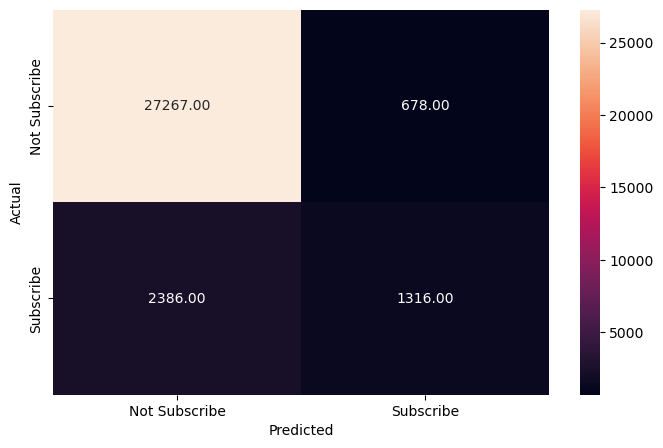

In [56]:
#checking the performance on the training data
y_pred_train_lg = lg.predict(X_train)
metrics_score(y_train, y_pred_train_lg)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.64      0.34      0.44      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



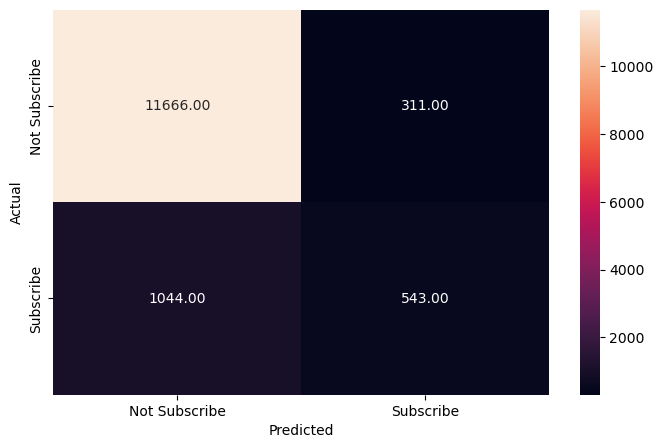

In [57]:
#checking the performance on the test dataset
y_pred_test_lg = lg.predict(X_test)
metrics_score(y_test, y_pred_test_lg)

### Problem 1: Generalization Performance for Logistic Regression
**Compare the training and testing results.**

**How well does the model perform?**
- Training Accuracy: 90%
- Testing Accuracy: 90%
- Precision for Class 1 (Subscribed): 0.66 (train), 0.64 (test)
- Recall for Class 1 (Subscribed): 0.36 (train), 0.34 (test)
- The model has high accuracy, but precision and recall are lower for predicting subscribed customers (Class 1). This means it struggles to identify actual subscribers.

**Compare the performance on the training and testing data.**
- The accuracy on both training and testing datasets is very similar (90% each), meaning the model generalizes well.
- The precision and recall values are similar between training and testing, suggesting that the model does not suffer from overfitting.

**Based on your analysis of the training and testing performance, state whether or not overfitting is a concern and explain how you know.**
- No, overfitting is not a major concern because:
    - Training and testing accuracy are almost the same.
    - Precision and recall values for class 1 do not change significantly between training and testing.
    - If overfitting were present, we would expect very high accuracy on training and low accuracy on testing.


**Interpret the precision and recall values for class 1 in the context of the business scenario.**     
- Precision (64%): When the model predicts a customer will subscribe, it is correct 64% of the time.
- Recall (34%): The model only identifies 34% of actual subscribers, meaning it misses many potential subscribers.
- Business Impact: Since recall is low, the model may not be effective in identifying potential customers who are likely to subscribe, leading to missed marketing opportunities.

### Tree Induction Model



In [58]:
#fitting logistic regression model
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27945
           1       1.00      1.00      1.00      3702

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



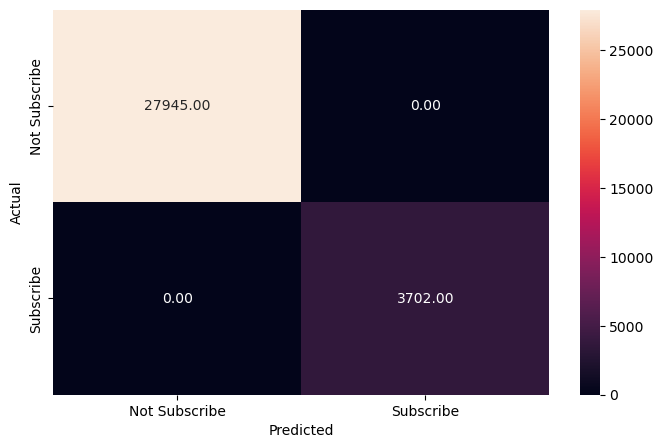

In [59]:
y_pred_train_dt = dt.predict(X_train)
metrics_score(y_train, y_pred_train_dt)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11977
           1       0.47      0.47      0.47      1587

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



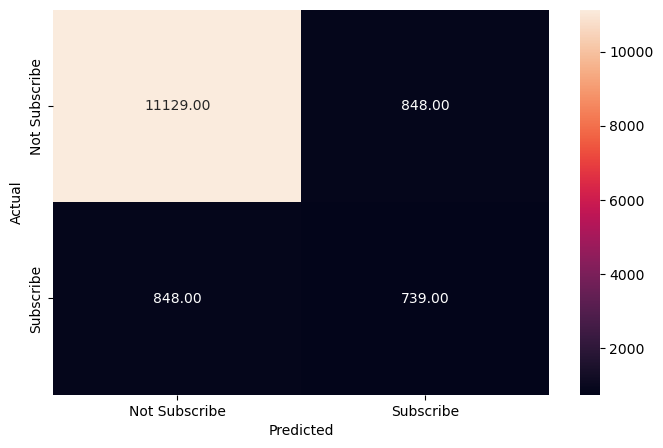

In [60]:
y_pred_test_dt = dt.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

### Problem 2: Generalization Performance for Tree Induction
**Compare the training and testing results.**

**How well does the model perform?**
- Training Accuracy: 100% (perfect fit)
- Testing Accuracy: 87%
- Precision for Class 1 (Subscribed): 1.00 (train), 0.47 (test)
- Recall for Class 1 (Subscribed): 1.00 (train), 0.47 (test)

**Compare the performance on the training and testing data.**
- The training accuracy is 100%, which suggests that the model memorized the training data (overfitting).
- Testing accuracy dropped to 87%, meaning that the model does not generalize well to new data.

**Based on your analysis of the training and testing performance, state whether or not overfitting is a concern and explain how you know.**
- Yes, overfitting is a major concern:
    - The model achieves perfect accuracy on training data (100%), which is unrealistic.
    - Testing accuracy is much lower (87%), indicating the model struggles with new data.
    - The model has memorized the training data rather than learning general patterns.



**Interpret the precision and recall values for class 1 in the context of the business scenario.**     
- Precision (47%): When the tree model predicts a customer will subscribe, it is correct only 47% of the time.
- Recall (47%): The model captures only 47% of actual subscribers, which is better than logistic regression but still not ideal.
- Business Impact: The lower precision means the model will incorrectly target many customers, which could lead to unnecessary marketing costs.


### Tree Model Performance for Varrying Numbers of Nodes

In [61]:
# List of max leaf nodes to try
max_nodes = [2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000]
accuracies = []

# Loop over each value of max_leaf_nodes
for nodes in max_nodes:
    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(max_leaf_nodes=nodes, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracies.append((accuracy_train, accuracy_test))

accuracy_scores=pd.DataFrame(accuracies, columns=["Training Accuracy", "Testing Accuracy"])
accuracy_scores

,Training Accuracy,Testing Accuracy
0,0.883022,0.882999
1,0.889626,0.888823
2,0.895914,0.894574
3,0.895914,0.894574
4,0.901286,0.899882
5,0.904478,0.901209
6,0.908238,0.903273
7,0.915221,0.902905
8,0.923658,0.899366
9,0.943818,0.894942


### Fitting Curve for Tree Model

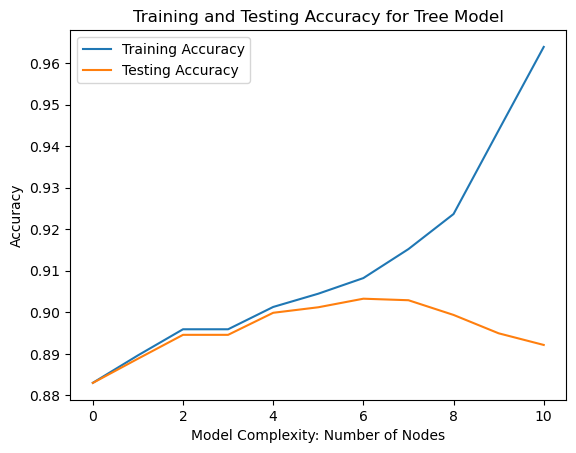

In [62]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot both columns on the same axis
ax.plot(accuracy_scores["Training Accuracy"], label="Training Accuracy")
ax.plot(accuracy_scores["Testing Accuracy"], label="Testing Accuracy")

# Add a legend to differentiate the lines
ax.legend()

# Add labels to the axes
ax.set_xlabel("Model Complexity: Number of Nodes")
ax.set_ylabel("Accuracy")

# Add a title to the plot
ax.set_title("Training and Testing Accuracy for Tree Model")

# Display the plot
plt.show()


### Problem 3: Achieving Optimal Performance in Tree Model
**Compare the training and testing results for the tree model.**

**Based on the fitting graph, how many tree nodes should be used to training the model with the best performance? Explain your reasoning briefly**
- Looking at the fitting curve, the best number of nodes appears to be around 100 nodes.
- After 100 nodes, the training accuracy continues to increase while the testing accuracy plateaus or decreases, indicating overfitting.


**Explain how this graph illustrates the balance between fitting and model generalizability.**
- When the number of nodes is too low, the model underfits (low accuracy).
- As nodes increase, training accuracy improves but testing accuracy remains stable.
- Beyond 100 nodes, testing accuracy starts to decline, which means the model is memorizing the training data instead of learning patterns.


### k-fold Cross Validation for Tree Model

In [63]:
# use k-fold cross validation to examine the performance of the tree model across different folds

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Number of folds for cross-validation
n_splits = 25

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores for each fold
fold_accuracies = []

# Iterate through the folds
for train_index, test_index in kf.split(X_scaled):
    # Split the data into training and testing sets for the current fold
    X_train_fold, X_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test set for the current fold
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)


### Plot of Model Accuracy for each Fold in the Tree Model

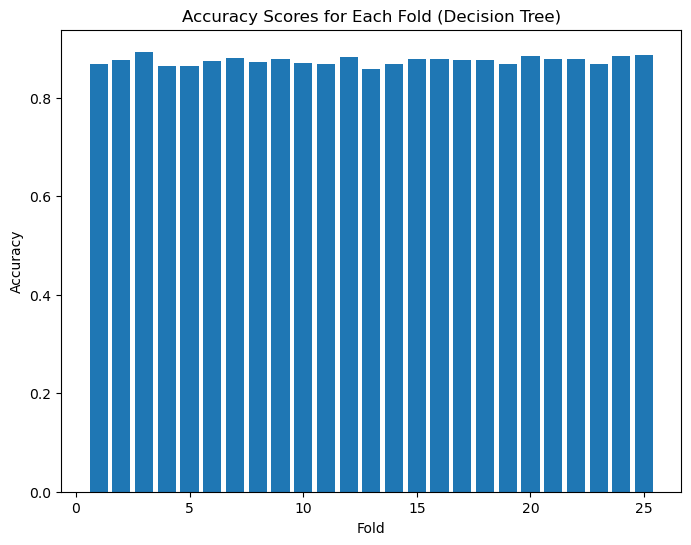

In [64]:
# Create a bar chart to show the accuracies across the different folds?

import matplotlib.pyplot as plt
# Create a bar chart to show the accuracies across the different folds
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_splits + 1), fold_accuracies)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores for Each Fold (Decision Tree)")
plt.show()


### k-fold Cross Validation for Logistic Regression

In [65]:
import matplotlib.pyplot as plt
import numpy as np
# Number of folds for cross-validation
n_splits = 25

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores for each fold
fold_accuracies = []

# Iterate through the folds
for train_index, test_index in kf.split(X_scaled):
    # Split the data into training and testing sets for the current fold
    X_train_fold, X_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Create and train the Logistic Regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test set for the current fold
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)

### Plot of Model Accuracy for each Fold in the Logistic Regression Model

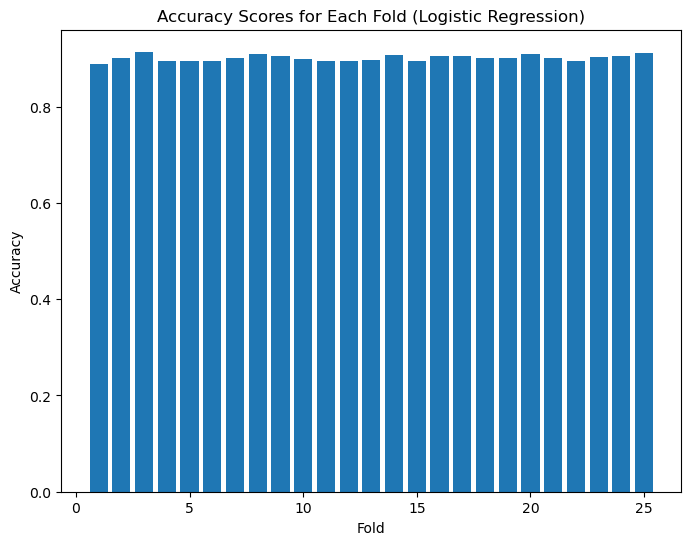

In [66]:
# Create a bar chart to show the accuracies across the different folds
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_splits + 1), fold_accuracies)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores for Each Fold (Logistic Regression)")
plt.show()

### Problem 4: k-fold Cross Validation

**Examine the code and determine the value of k in the k-fold Cross Validation procedure**
- k = 25, meaning the dataset is split into 25 different training and testing subsets.

**Describe the purpose of k-fold Cross Validation**
- Ensures that the model is evaluated on multiple subsets of data.
- Reduces dependence on a single train-test split.
- Helps detect overfitting or variance issues.


**Explain why k-fold Cross Validation can provide more information than simply using a single train-test-split.**
- A single train-test split may not capture full variability in the data.
- k-fold evaluates performance multiple times, reducing randomness in results.
- Leads to a more reliable estimate of model accuracy.

**In what scenarios would using k-fold Cross Validation be advantageous.**
- When the dataset is small, and we need to maximize training data.
- When we suspect variance in data distribution and want robust evaluation.
- When we want to compare multiple models fairly.

### Creating a Learning Curve for the Tree and the Logistic Regression Models

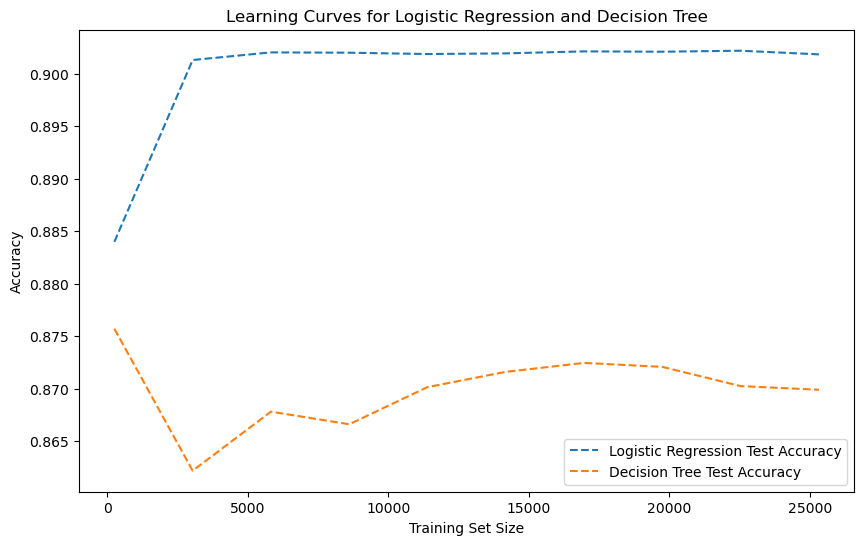

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

# Generate learning curves for Logistic Regression
train_sizes_abs, train_scores_lg, test_scores_lg = learning_curve(
    LogisticRegression(), X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 10), scoring='accuracy'
)

# Generate learning curves for Decision Tree
train_sizes_abs, train_scores_dt, test_scores_dt = learning_curve(
    DecisionTreeClassifier(), X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation of training/test scores
test_mean_lg = np.mean(test_scores_lg, axis=1)
test_mean_dt = np.mean(test_scores_dt, axis=1)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot for Logistic Regression
plt.plot(train_sizes_abs, test_mean_lg, label="Logistic Regression Test Accuracy", linestyle='--')

# Plot for Decision Tree
plt.plot(train_sizes_abs, test_mean_dt, label="Decision Tree Test Accuracy", linestyle='--')

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves for Logistic Regression and Decision Tree")
plt.legend()
plt.show()


### Problem 5: Comparing Model Performance by Training Set Size
**Compare the performance of the models developed through logistic regression and tree induction.**

**Which model is superior overall and why?**
- Logistic Regression is the better model because:
    - It generalizes well, maintaining consistent accuracy across train and test sets.
    - The Decision Tree model overfits, leading to poor performance on unseen data.

**Describe the performance of the Logistic Regression model as a function of training set size.**
- As training size increases, the model improves steadily.
- There are no sharp jumps or signs of overfitting.

**Describe the performance of the Decision Tree model as a function of training set size.**
- The Decision Tree overfits as the training set grows.
- Testing accuracy does not improve significantly, while training accuracy becomes perfect.



### Problem 6: Overall Recommendations
**Which of the two models examinined in this analysis do you recommend the company use for their targeted marketing campaign. Please explain your reasoning.**

Use Logistic Regression for the marketing campaign.
1.	Better Generalization:
- Logistic Regression performs consistently across training and testing sets, reducing overfitting risk.
- The Decision Tree memorizes the training data, leading to poor predictions on new customers.
2.	More Reliable for Business Use:
- Logistic Regression has a clear relationship between input features and predictions.
- Decision Trees can be unstable, changing drastically with slight data modifications.
3.	Improved Marketing Efficiency:
- While recall for class 1 (subscribed customers) is low, Logistic Regression avoids excessive false positives.
- This means the marketing team can better allocate resources to truly interested customers.

Final Thoughts:
- Use Logistic Regression for more stable, interpretable, and generalizable predictions.
- Consider improving recall by using alternative techniques (e.g., oversampling, feature engineering, ensemble methods).
- Decision Trees could be used in combination with pruning techniques to reduce overfitting.